## LIBRARIES

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import MobileNet, VGG16, InceptionV3, ResNet50
from tensorflow.keras.applications.mobilenet import preprocess_input

## PREPROCESS

In [2]:
def load_preprocess(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img = load_img(os.path.join(folder_path, filename), target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array) 
        images.append(img_array)
        labels.append(label)

    return np.array(images), np.array(labels)

healthy_dir = 'Healthy'
unhealthy_dir = 'Unhealthy'

healthy_images, healthy_labels = load_preprocess(healthy_dir, 1)
unhealthy_images, unhealthy_labels = load_preprocess(unhealthy_dir, 0)

X = np.concatenate((healthy_images, unhealthy_images), axis=0)
y = np.concatenate((healthy_labels, unhealthy_labels), axis=0)

## MODELS

In [ ]:
def mobilenet(optimizer='adam'):
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def vgg16(optimizer='adam'):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def inceptionv3(optimizer='adam'):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [3]:
def resnet50(optimizer='adam'):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [4]:
def train_and_evaluate_model(X_train, X_test, y_train, y_test, model):
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    return history, test_loss, test_accuracy

In [5]:
splits = [(0.2, 0.8), (0.3, 0.7), (0.4, 0.6)]  
optimizers = ['adam', 'sgd', 'rmsprop']
models = {
    'MobileNet': mobilenet,
    'VGG16': vgg16,
    'InceptionV3': inceptionv3,
    'ResNet50': resnet50
}

results = {}

for model_name, model_func in models.items():
    for optimizer in optimizers:
        model_results = []
        for test_size, train_size in splits:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
            model = model_func(optimizer)
            history, test_loss, test_accuracy = train_and_evaluate_model(X_train, X_test, y_train, y_test, model)
            model_results.append(test_accuracy)
        results[f'{model_name} ({optimizer})'] = model_results




Epoch 1/10


22/22 [==============================] - 11s 366ms/step - loss: 0.3616 - accuracy: 0.8350 - val_loss: 0.2078 - val_accuracy: 0.9191
Epoch 2/10
22/22 [==============================] - 7s 308ms/step - loss: 0.1029 - accuracy: 0.9711 - val_loss: 0.1186 - val_accuracy: 0.9538
Epoch 3/10
22/22 [==============================] - 8s 356ms/step - loss: 0.0541 - accuracy: 0.9913 - val_loss: 0.0916 - val_accuracy: 0.9769
Epoch 4/10
22/22 [==============================] - 7s 330ms/step - loss: 0.0317 - accuracy: 0.9971 - val_loss: 0.0814 - val_accuracy: 0.9827
Epoch 5/10
22/22 [==============================] - 7s 317ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.0725 - val_accuracy: 0.9827
Epoch 6/10
22/22 [==============================] - 7s 322ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.0728 - val_accuracy: 0.9827
Epoch 7/10
22/22 [==============================] - 8s 347ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0743 - val_accuracy: 0.9827


In [6]:
accuracy_table = pd.DataFrame(results, index=['(80-20)', '(70-30)', '(60-40)'])

In [7]:
print("Accuracy Table:")
print(accuracy_table)

Accuracy Table:
         MobileNet (adam)  MobileNet (sgd)  MobileNet (rmsprop)  VGG16 (adam)  \
(80-20)          0.976879         0.971098             0.982659      0.878613   
(70-30)          0.969231         0.950000             0.965385      0.873077   
(60-40)          0.971098         0.945087             0.953757      0.872832   

         VGG16 (sgd)  VGG16 (rmsprop)  InceptionV3 (adam)  InceptionV3 (sgd)  \
(80-20)     0.728324         0.855491            0.901734           0.895954   
(70-30)     0.742308         0.869231            0.900000           0.903846   
(60-40)     0.520231         0.803468            0.913295           0.884393   

         InceptionV3 (rmsprop)  ResNet50 (adam)  ResNet50 (sgd)  \
(80-20)               0.913295         0.745665        0.618497   
(70-30)               0.873077         0.730769        0.707692   
(60-40)               0.893064         0.705202        0.552023   

         ResNet50 (rmsprop)  
(80-20)            0.722543  
(70-30)  

## GRAPHS

In [ ]:
def plot_training(history, title):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(title)
    plt.show()

Epoch 1/10
22/22 [==============================] - 9s 341ms/step - loss: 0.4188 - accuracy: 0.7916 - val_loss: 0.2193 - val_accuracy: 0.9075
Epoch 2/10
22/22 [==============================] - 6s 296ms/step - loss: 0.1189 - accuracy: 0.9667 - val_loss: 0.1171 - val_accuracy: 0.9538
Epoch 3/10
22/22 [==============================] - 6s 295ms/step - loss: 0.0647 - accuracy: 0.9812 - val_loss: 0.0937 - val_accuracy: 0.9711
Epoch 4/10
22/22 [==============================] - 6s 295ms/step - loss: 0.0436 - accuracy: 0.9913 - val_loss: 0.0830 - val_accuracy: 0.9769
Epoch 5/10
22/22 [==============================] - 6s 295ms/step - loss: 0.0282 - accuracy: 0.9986 - val_loss: 0.0807 - val_accuracy: 0.9769
Epoch 6/10
22/22 [==============================] - 7s 305ms/step - loss: 0.0201 - accuracy: 0.9986 - val_loss: 0.0724 - val_accuracy: 0.9769
Epoch 7/10
22/22 [==============================] - 7s 310ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.0651 - val_accuracy: 0.9827
Epoch 

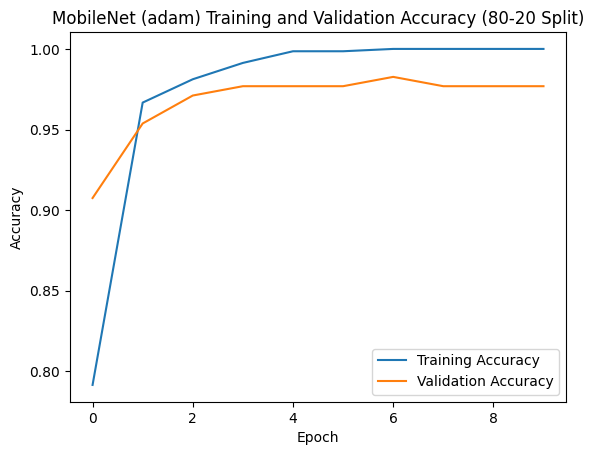

Epoch 1/10
19/19 [==============================] - 9s 393ms/step - loss: 0.4109 - accuracy: 0.7964 - val_loss: 0.1940 - val_accuracy: 0.9231
Epoch 2/10
19/19 [==============================] - 7s 361ms/step - loss: 0.1310 - accuracy: 0.9520 - val_loss: 0.1399 - val_accuracy: 0.9577
Epoch 3/10
19/19 [==============================] - 7s 359ms/step - loss: 0.0602 - accuracy: 0.9868 - val_loss: 0.1203 - val_accuracy: 0.9577
Epoch 4/10
19/19 [==============================] - 7s 357ms/step - loss: 0.0372 - accuracy: 0.9967 - val_loss: 0.1323 - val_accuracy: 0.9692
Epoch 5/10
19/19 [==============================] - 7s 364ms/step - loss: 0.0266 - accuracy: 0.9967 - val_loss: 0.1225 - val_accuracy: 0.9654
Epoch 6/10
19/19 [==============================] - 7s 363ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.1168 - val_accuracy: 0.9692
Epoch 7/10
19/19 [==============================] - 7s 366ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.1148 - val_accuracy: 0.9615
Epoch 

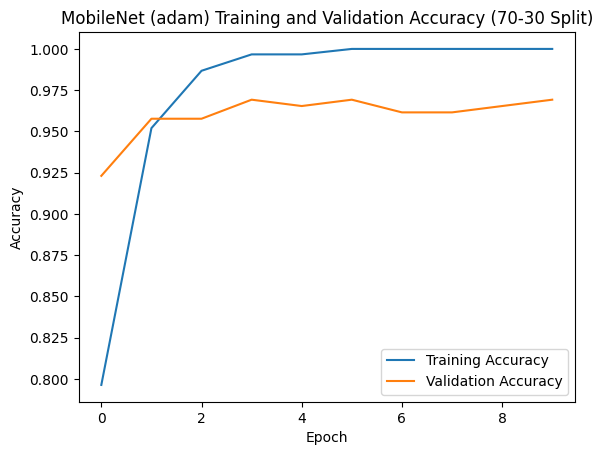

Epoch 1/10
17/17 [==============================] - 12s 614ms/step - loss: 0.5717 - accuracy: 0.6988 - val_loss: 0.2676 - val_accuracy: 0.8873
Epoch 2/10
17/17 [==============================] - 8s 464ms/step - loss: 0.1452 - accuracy: 0.9537 - val_loss: 0.1528 - val_accuracy: 0.9480
Epoch 3/10
17/17 [==============================] - 7s 435ms/step - loss: 0.0796 - accuracy: 0.9768 - val_loss: 0.1268 - val_accuracy: 0.9595
Epoch 4/10
17/17 [==============================] - 7s 435ms/step - loss: 0.0490 - accuracy: 0.9942 - val_loss: 0.1207 - val_accuracy: 0.9682
Epoch 5/10
17/17 [==============================] - 7s 436ms/step - loss: 0.0333 - accuracy: 0.9961 - val_loss: 0.1253 - val_accuracy: 0.9682
Epoch 6/10
17/17 [==============================] - 7s 450ms/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 0.1102 - val_accuracy: 0.9624
Epoch 7/10
17/17 [==============================] - 7s 433ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.1130 - val_accuracy: 0.9624
Epoch

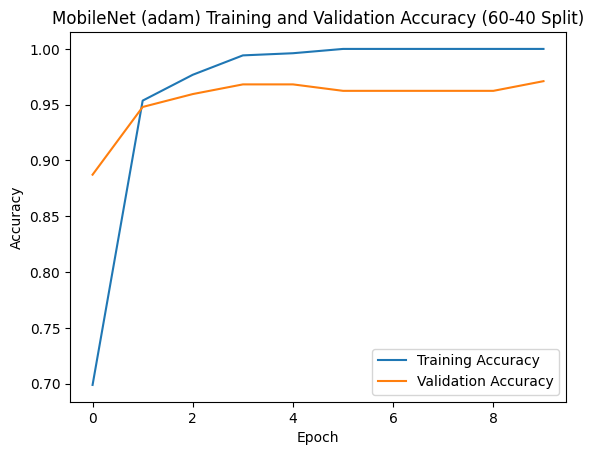

Epoch 1/10
22/22 [==============================] - 9s 357ms/step - loss: 0.5506 - accuracy: 0.7279 - val_loss: 0.3831 - val_accuracy: 0.8555
Epoch 2/10
22/22 [==============================] - 7s 326ms/step - loss: 0.3367 - accuracy: 0.8886 - val_loss: 0.2790 - val_accuracy: 0.9133
Epoch 3/10
22/22 [==============================] - 7s 329ms/step - loss: 0.2611 - accuracy: 0.9146 - val_loss: 0.2147 - val_accuracy: 0.9191
Epoch 4/10
22/22 [==============================] - 7s 328ms/step - loss: 0.2032 - accuracy: 0.9465 - val_loss: 0.1979 - val_accuracy: 0.9306
Epoch 5/10
22/22 [==============================] - 7s 327ms/step - loss: 0.1746 - accuracy: 0.9595 - val_loss: 0.1785 - val_accuracy: 0.9422
Epoch 6/10
22/22 [==============================] - 7s 343ms/step - loss: 0.1499 - accuracy: 0.9609 - val_loss: 0.1574 - val_accuracy: 0.9538
Epoch 7/10
22/22 [==============================] - 7s 339ms/step - loss: 0.1341 - accuracy: 0.9725 - val_loss: 0.1415 - val_accuracy: 0.9538
Epoch 

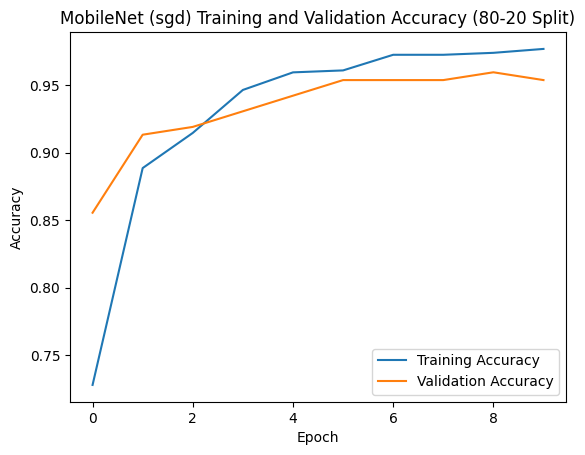

Epoch 1/10
19/19 [==============================] - 15s 412ms/step - loss: 0.5867 - accuracy: 0.6838 - val_loss: 0.4273 - val_accuracy: 0.8115
Epoch 2/10
19/19 [==============================] - 7s 382ms/step - loss: 0.3640 - accuracy: 0.8560 - val_loss: 0.3248 - val_accuracy: 0.8692
Epoch 3/10
19/19 [==============================] - 7s 381ms/step - loss: 0.2672 - accuracy: 0.9305 - val_loss: 0.2885 - val_accuracy: 0.9000
Epoch 4/10
19/19 [==============================] - 7s 377ms/step - loss: 0.2179 - accuracy: 0.9487 - val_loss: 0.2297 - val_accuracy: 0.9308
Epoch 5/10
19/19 [==============================] - 7s 374ms/step - loss: 0.1783 - accuracy: 0.9536 - val_loss: 0.2047 - val_accuracy: 0.9385
Epoch 6/10
19/19 [==============================] - 7s 381ms/step - loss: 0.1555 - accuracy: 0.9603 - val_loss: 0.1909 - val_accuracy: 0.9385
Epoch 7/10
19/19 [==============================] - 7s 379ms/step - loss: 0.1395 - accuracy: 0.9619 - val_loss: 0.1729 - val_accuracy: 0.9538
Epoch

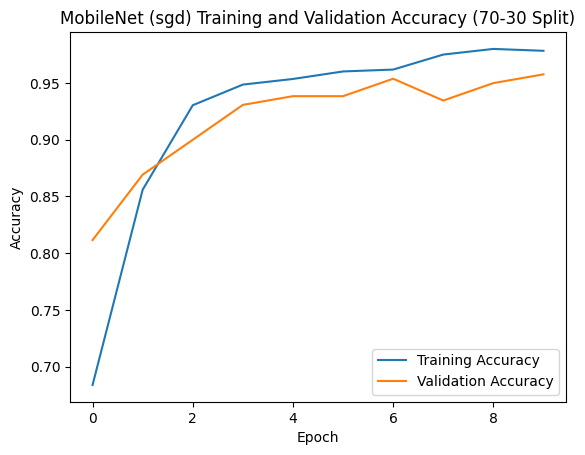

Epoch 1/10
17/17 [==============================] - 9s 474ms/step - loss: 0.5974 - accuracy: 0.6660 - val_loss: 0.4763 - val_accuracy: 0.7341
Epoch 2/10
17/17 [==============================] - 7s 431ms/step - loss: 0.3725 - accuracy: 0.8571 - val_loss: 0.4227 - val_accuracy: 0.7601
Epoch 3/10
17/17 [==============================] - 7s 431ms/step - loss: 0.2865 - accuracy: 0.8900 - val_loss: 0.2827 - val_accuracy: 0.8988
Epoch 4/10
17/17 [==============================] - 7s 436ms/step - loss: 0.2366 - accuracy: 0.9305 - val_loss: 0.2526 - val_accuracy: 0.9075
Epoch 5/10
17/17 [==============================] - 7s 431ms/step - loss: 0.1922 - accuracy: 0.9498 - val_loss: 0.2138 - val_accuracy: 0.9393
Epoch 6/10
17/17 [==============================] - 7s 446ms/step - loss: 0.1657 - accuracy: 0.9691 - val_loss: 0.2324 - val_accuracy: 0.9075
Epoch 7/10
17/17 [==============================] - 8s 462ms/step - loss: 0.1537 - accuracy: 0.9672 - val_loss: 0.1805 - val_accuracy: 0.9509
Epoch 

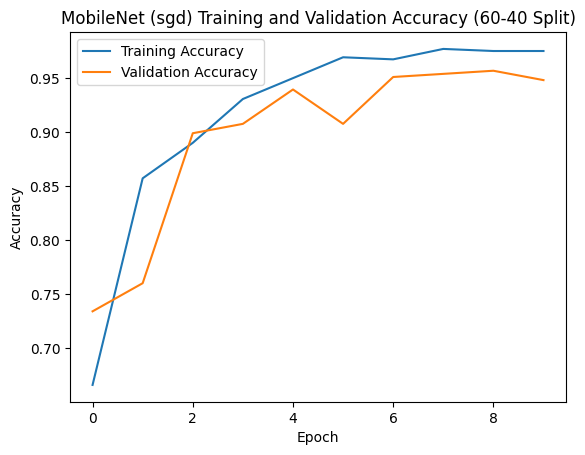

Epoch 1/10
22/22 [==============================] - 10s 373ms/step - loss: 0.5744 - accuracy: 0.7945 - val_loss: 0.2951 - val_accuracy: 0.8671
Epoch 2/10
22/22 [==============================] - 7s 327ms/step - loss: 0.1933 - accuracy: 0.9262 - val_loss: 0.5320 - val_accuracy: 0.7803
Epoch 3/10
22/22 [==============================] - 7s 335ms/step - loss: 0.1368 - accuracy: 0.9493 - val_loss: 0.4415 - val_accuracy: 0.8266
Epoch 4/10
22/22 [==============================] - 7s 324ms/step - loss: 0.0907 - accuracy: 0.9740 - val_loss: 0.1371 - val_accuracy: 0.9538
Epoch 5/10
22/22 [==============================] - 7s 325ms/step - loss: 0.0843 - accuracy: 0.9682 - val_loss: 0.0970 - val_accuracy: 0.9711
Epoch 6/10
22/22 [==============================] - 7s 324ms/step - loss: 0.0727 - accuracy: 0.9783 - val_loss: 0.1057 - val_accuracy: 0.9595
Epoch 7/10
22/22 [==============================] - 7s 327ms/step - loss: 0.0520 - accuracy: 0.9870 - val_loss: 0.1223 - val_accuracy: 0.9711
Epoch

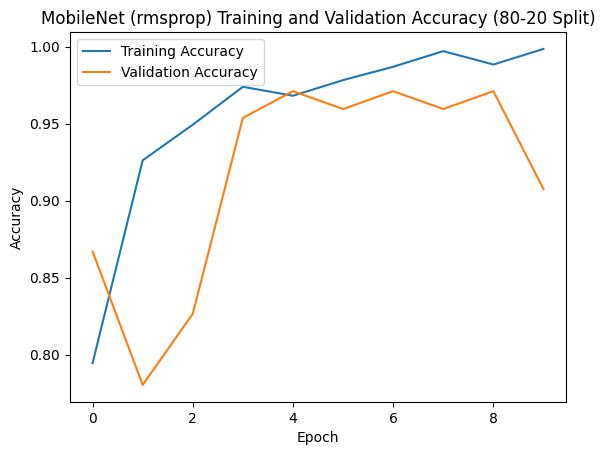

Epoch 1/10
19/19 [==============================] - 10s 430ms/step - loss: 0.6261 - accuracy: 0.7914 - val_loss: 0.2421 - val_accuracy: 0.9269
Epoch 2/10
19/19 [==============================] - 7s 394ms/step - loss: 0.2401 - accuracy: 0.8990 - val_loss: 0.1489 - val_accuracy: 0.9577
Epoch 3/10
19/19 [==============================] - 7s 386ms/step - loss: 0.0921 - accuracy: 0.9735 - val_loss: 0.1258 - val_accuracy: 0.9577
Epoch 4/10
19/19 [==============================] - 7s 381ms/step - loss: 0.1802 - accuracy: 0.9387 - val_loss: 0.1242 - val_accuracy: 0.9577
Epoch 5/10
19/19 [==============================] - 7s 384ms/step - loss: 0.0347 - accuracy: 0.9983 - val_loss: 0.1247 - val_accuracy: 0.9500
Epoch 6/10
19/19 [==============================] - 7s 388ms/step - loss: 0.0620 - accuracy: 0.9785 - val_loss: 0.1165 - val_accuracy: 0.9577
Epoch 7/10
19/19 [==============================] - 7s 383ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.1347 - val_accuracy: 0.9423
Epoch

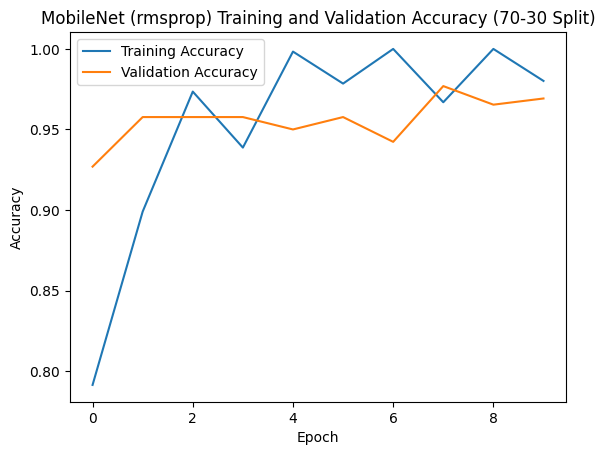

Epoch 1/10
17/17 [==============================] - 10s 499ms/step - loss: 0.7035 - accuracy: 0.7625 - val_loss: 0.2977 - val_accuracy: 0.8526
Epoch 2/10
17/17 [==============================] - 7s 443ms/step - loss: 0.2469 - accuracy: 0.8880 - val_loss: 0.2328 - val_accuracy: 0.8931
Epoch 3/10
17/17 [==============================] - 7s 437ms/step - loss: 0.1630 - accuracy: 0.9382 - val_loss: 0.5247 - val_accuracy: 0.7688
Epoch 4/10
17/17 [==============================] - 7s 429ms/step - loss: 0.1012 - accuracy: 0.9672 - val_loss: 0.2238 - val_accuracy: 0.9075
Epoch 5/10
17/17 [==============================] - 7s 432ms/step - loss: 0.0575 - accuracy: 0.9884 - val_loss: 0.1223 - val_accuracy: 0.9624
Epoch 6/10
17/17 [==============================] - 7s 429ms/step - loss: 0.1418 - accuracy: 0.9479 - val_loss: 0.2691 - val_accuracy: 0.9075
Epoch 7/10
17/17 [==============================] - 7s 432ms/step - loss: 0.0291 - accuracy: 0.9942 - val_loss: 0.1914 - val_accuracy: 0.9162
Epoch

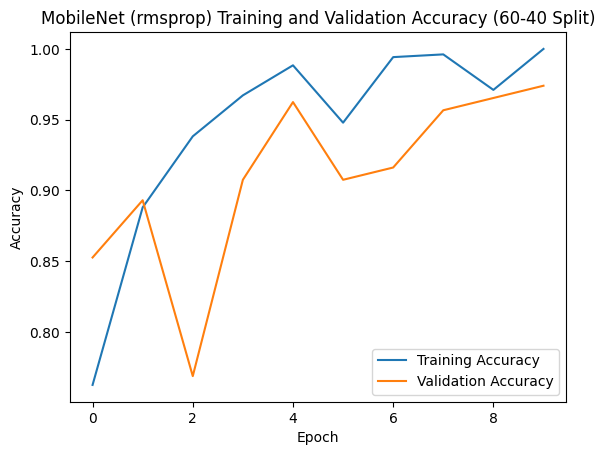

Epoch 1/10
22/22 [==============================] - 94s 4s/step - loss: 0.6451 - accuracy: 0.6397 - val_loss: 0.5505 - val_accuracy: 0.7572
Epoch 2/10
22/22 [==============================] - 89s 4s/step - loss: 0.5315 - accuracy: 0.7583 - val_loss: 0.5281 - val_accuracy: 0.7168
Epoch 3/10
22/22 [==============================] - 89s 4s/step - loss: 0.4623 - accuracy: 0.8046 - val_loss: 0.4357 - val_accuracy: 0.8035
Epoch 4/10
22/22 [==============================] - 89s 4s/step - loss: 0.4095 - accuracy: 0.8423 - val_loss: 0.3780 - val_accuracy: 0.8728
Epoch 5/10
22/22 [==============================] - 88s 4s/step - loss: 0.3654 - accuracy: 0.8770 - val_loss: 0.3453 - val_accuracy: 0.8786
Epoch 6/10
22/22 [==============================] - 89s 4s/step - loss: 0.3285 - accuracy: 0.8886 - val_loss: 0.3295 - val_accuracy: 0.8902
Epoch 7/10
22/22 [==============================] - 89s 4s/step - loss: 0.3071 - accuracy: 0.8857 - val_loss: 0.3173 - val_accuracy: 0.8728
Epoch 8/10
22/22 [==

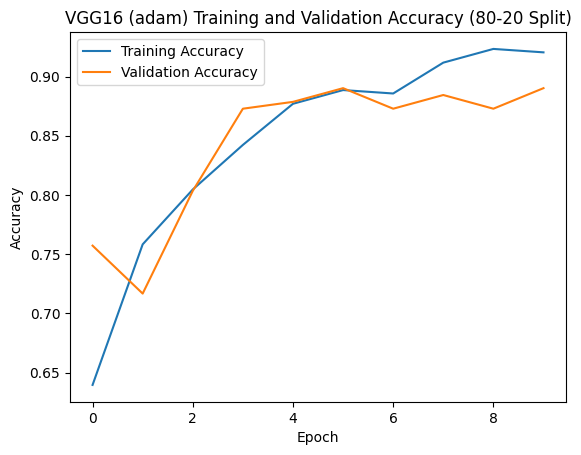

Epoch 1/10
19/19 [==============================] - 92s 5s/step - loss: 0.6439 - accuracy: 0.6126 - val_loss: 0.5575 - val_accuracy: 0.7231
Epoch 2/10
19/19 [==============================] - 89s 5s/step - loss: 0.5192 - accuracy: 0.7632 - val_loss: 0.4507 - val_accuracy: 0.8231
Epoch 3/10
19/19 [==============================] - 89s 5s/step - loss: 0.4495 - accuracy: 0.8245 - val_loss: 0.3950 - val_accuracy: 0.8500
Epoch 4/10
19/19 [==============================] - 88s 5s/step - loss: 0.3910 - accuracy: 0.8725 - val_loss: 0.3650 - val_accuracy: 0.8500
Epoch 5/10
19/19 [==============================] - 89s 5s/step - loss: 0.3581 - accuracy: 0.8808 - val_loss: 0.3237 - val_accuracy: 0.8962
Epoch 6/10
19/19 [==============================] - 89s 5s/step - loss: 0.3171 - accuracy: 0.8990 - val_loss: 0.3246 - val_accuracy: 0.8538
Epoch 7/10
19/19 [==============================] - 89s 5s/step - loss: 0.3047 - accuracy: 0.8924 - val_loss: 0.2906 - val_accuracy: 0.8808
Epoch 8/10
19/19 [==

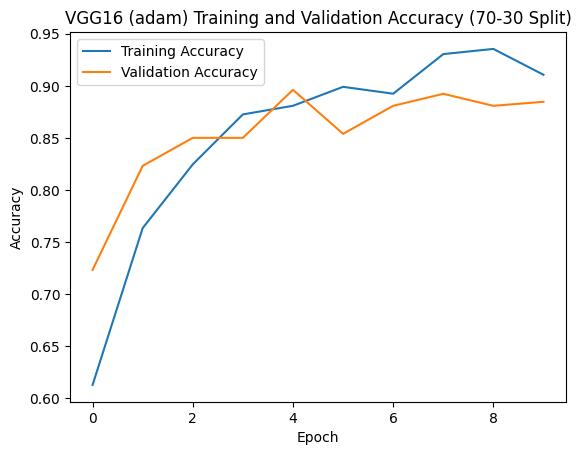

Epoch 1/10
17/17 [==============================] - 92s 5s/step - loss: 0.6590 - accuracy: 0.5830 - val_loss: 0.5838 - val_accuracy: 0.7457
Epoch 2/10
17/17 [==============================] - 90s 5s/step - loss: 0.5545 - accuracy: 0.7394 - val_loss: 0.5202 - val_accuracy: 0.7659
Epoch 3/10
17/17 [==============================] - 90s 5s/step - loss: 0.4979 - accuracy: 0.8012 - val_loss: 0.4646 - val_accuracy: 0.7977
Epoch 4/10
17/17 [==============================] - 88s 5s/step - loss: 0.4442 - accuracy: 0.8089 - val_loss: 0.4256 - val_accuracy: 0.8237
Epoch 5/10
17/17 [==============================] - 3142s 196s/step - loss: 0.4140 - accuracy: 0.8243 - val_loss: 0.4045 - val_accuracy: 0.8237
Epoch 6/10
17/17 [==============================] - 76s 5s/step - loss: 0.3788 - accuracy: 0.8475 - val_loss: 0.3617 - val_accuracy: 0.8642
Epoch 7/10
17/17 [==============================] - 77s 5s/step - loss: 0.3451 - accuracy: 0.8726 - val_loss: 0.3420 - val_accuracy: 0.8699
Epoch 8/10
17/17

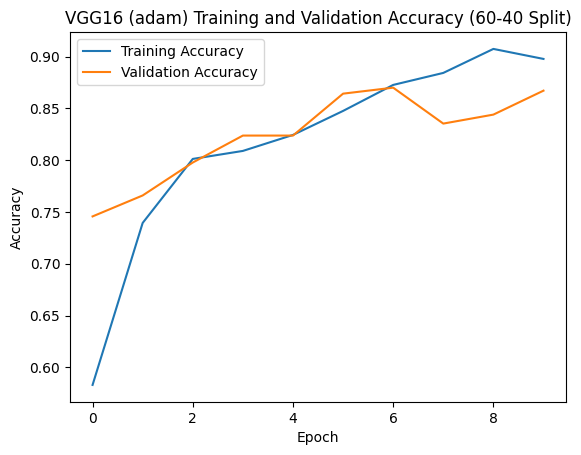

Epoch 1/10
22/22 [==============================] - 90s 4s/step - loss: 0.7109 - accuracy: 0.4356 - val_loss: 0.6942 - val_accuracy: 0.5202
Epoch 2/10
22/22 [==============================] - 87s 4s/step - loss: 0.6939 - accuracy: 0.5297 - val_loss: 0.6774 - val_accuracy: 0.6243
Epoch 3/10
22/22 [==============================] - 87s 4s/step - loss: 0.6793 - accuracy: 0.5904 - val_loss: 0.6681 - val_accuracy: 0.6301
Epoch 4/10
22/22 [==============================] - 87s 4s/step - loss: 0.6701 - accuracy: 0.5832 - val_loss: 0.6528 - val_accuracy: 0.6647
Epoch 5/10
22/22 [==============================] - 88s 4s/step - loss: 0.6568 - accuracy: 0.6353 - val_loss: 0.6447 - val_accuracy: 0.6532
Epoch 6/10
22/22 [==============================] - 87s 4s/step - loss: 0.6473 - accuracy: 0.6585 - val_loss: 0.6336 - val_accuracy: 0.7399
Epoch 7/10
22/22 [==============================] - 88s 4s/step - loss: 0.6406 - accuracy: 0.6874 - val_loss: 0.6268 - val_accuracy: 0.6647
Epoch 8/10
22/22 [==

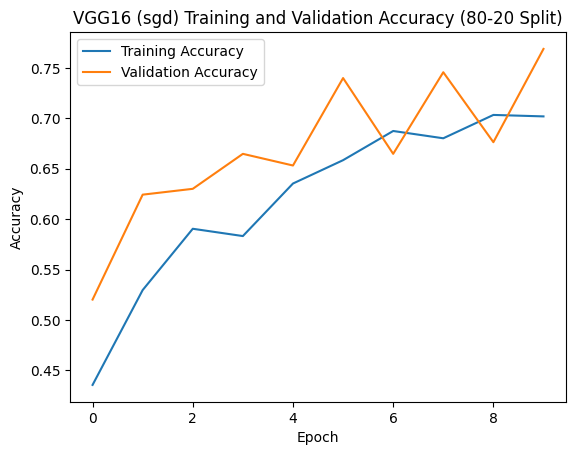

Epoch 1/10
19/19 [==============================] - 91s 5s/step - loss: 0.7594 - accuracy: 0.4884 - val_loss: 0.6933 - val_accuracy: 0.4885
Epoch 2/10
19/19 [==============================] - 87s 5s/step - loss: 0.6852 - accuracy: 0.5447 - val_loss: 0.6745 - val_accuracy: 0.5577
Epoch 3/10
19/19 [==============================] - 88s 5s/step - loss: 0.6736 - accuracy: 0.5795 - val_loss: 0.6627 - val_accuracy: 0.6731
Epoch 4/10
19/19 [==============================] - 87s 5s/step - loss: 0.6605 - accuracy: 0.6142 - val_loss: 0.6484 - val_accuracy: 0.7154
Epoch 5/10
19/19 [==============================] - 87s 5s/step - loss: 0.6507 - accuracy: 0.6374 - val_loss: 0.6398 - val_accuracy: 0.6269
Epoch 6/10
19/19 [==============================] - 86s 5s/step - loss: 0.6406 - accuracy: 0.6341 - val_loss: 0.6314 - val_accuracy: 0.7154
Epoch 7/10
19/19 [==============================] - 87s 5s/step - loss: 0.6328 - accuracy: 0.6523 - val_loss: 0.6208 - val_accuracy: 0.7231
Epoch 8/10
19/19 [==

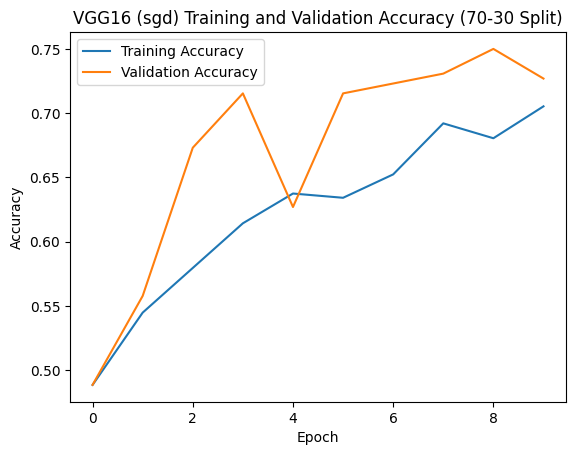

Epoch 1/10
17/17 [==============================] - 90s 5s/step - loss: 0.6927 - accuracy: 0.5386 - val_loss: 0.6751 - val_accuracy: 0.6329
Epoch 2/10
17/17 [==============================] - 89s 5s/step - loss: 0.6736 - accuracy: 0.6216 - val_loss: 0.6813 - val_accuracy: 0.5029
Epoch 3/10
17/17 [==============================] - 87s 5s/step - loss: 0.6645 - accuracy: 0.6042 - val_loss: 0.6575 - val_accuracy: 0.5896
Epoch 4/10
17/17 [==============================] - 89s 5s/step - loss: 0.6522 - accuracy: 0.6583 - val_loss: 0.6605 - val_accuracy: 0.5145
Epoch 5/10
17/17 [==============================] - 140s 9s/step - loss: 0.6453 - accuracy: 0.6969 - val_loss: 0.6392 - val_accuracy: 0.6705
Epoch 6/10
17/17 [==============================] - 85s 5s/step - loss: 0.6377 - accuracy: 0.6699 - val_loss: 0.6328 - val_accuracy: 0.6821
Epoch 7/10
17/17 [==============================] - 88s 5s/step - loss: 0.6342 - accuracy: 0.6718 - val_loss: 0.6365 - val_accuracy: 0.6156
Epoch 8/10
17/17 [=

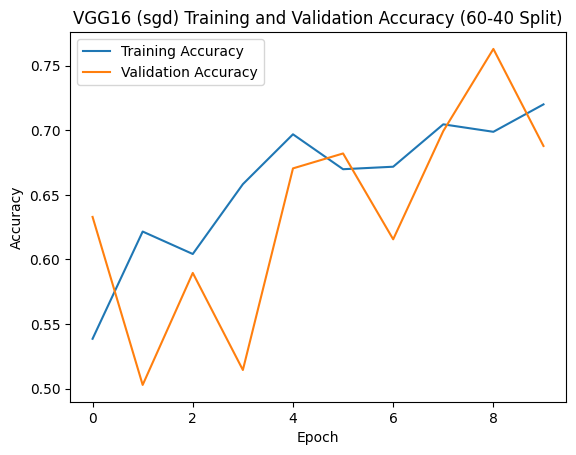

Epoch 1/10
22/22 [==============================] - 90s 4s/step - loss: 0.6135 - accuracy: 0.6671 - val_loss: 0.6221 - val_accuracy: 0.5954
Epoch 2/10
22/22 [==============================] - 91s 4s/step - loss: 0.5129 - accuracy: 0.7728 - val_loss: 0.4632 - val_accuracy: 0.8266
Epoch 3/10
22/22 [==============================] - 88s 4s/step - loss: 0.4398 - accuracy: 0.8205 - val_loss: 0.4797 - val_accuracy: 0.7457
Epoch 4/10
22/22 [==============================] - 87s 4s/step - loss: 0.4215 - accuracy: 0.8205 - val_loss: 0.3867 - val_accuracy: 0.8382
Epoch 5/10
22/22 [==============================] - 88s 4s/step - loss: 0.3706 - accuracy: 0.8669 - val_loss: 0.3609 - val_accuracy: 0.8786
Epoch 6/10
22/22 [==============================] - 88s 4s/step - loss: 0.3428 - accuracy: 0.8741 - val_loss: 0.3268 - val_accuracy: 0.8728
Epoch 7/10
22/22 [==============================] - 87s 4s/step - loss: 0.3280 - accuracy: 0.8784 - val_loss: 0.3206 - val_accuracy: 0.8671
Epoch 8/10
22/22 [==

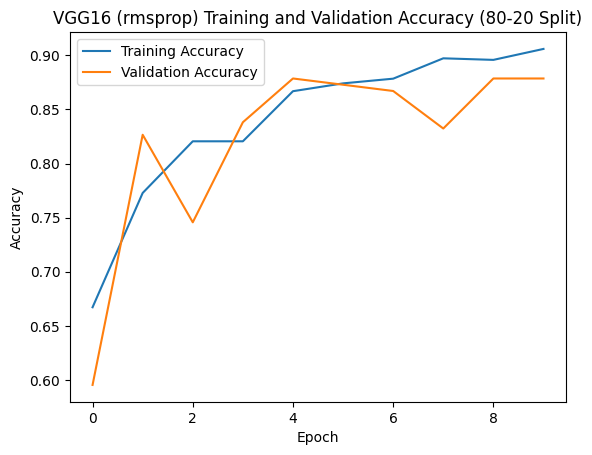

Epoch 1/10
19/19 [==============================] - 91s 5s/step - loss: 0.6473 - accuracy: 0.6374 - val_loss: 0.5376 - val_accuracy: 0.7923
Epoch 2/10
19/19 [==============================] - 87s 5s/step - loss: 0.5559 - accuracy: 0.7401 - val_loss: 0.4970 - val_accuracy: 0.7808
Epoch 3/10
19/19 [==============================] - 87s 5s/step - loss: 0.5035 - accuracy: 0.7583 - val_loss: 0.4413 - val_accuracy: 0.8192
Epoch 4/10
19/19 [==============================] - 87s 5s/step - loss: 0.4647 - accuracy: 0.7930 - val_loss: 0.4232 - val_accuracy: 0.8154
Epoch 5/10
19/19 [==============================] - 85s 5s/step - loss: 0.4223 - accuracy: 0.8394 - val_loss: 0.3853 - val_accuracy: 0.8423
Epoch 6/10
19/19 [==============================] - 84s 5s/step - loss: 0.3943 - accuracy: 0.8560 - val_loss: 0.3450 - val_accuracy: 0.9000
Epoch 7/10
19/19 [==============================] - 82s 4s/step - loss: 0.3667 - accuracy: 0.8560 - val_loss: 0.3280 - val_accuracy: 0.8808
Epoch 8/10
19/19 [==

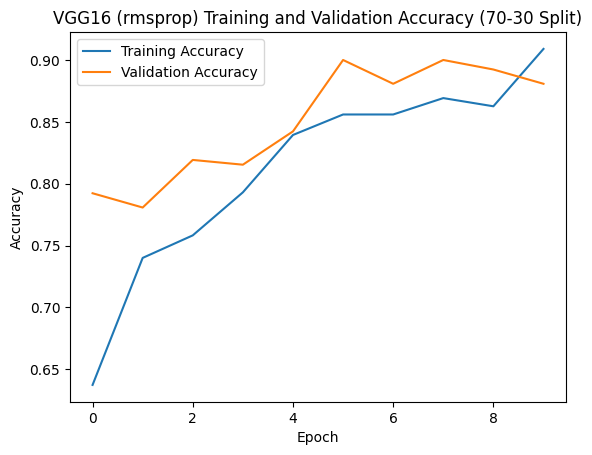

Epoch 1/10
17/17 [==============================] - 85s 5s/step - loss: 0.6489 - accuracy: 0.6023 - val_loss: 0.6121 - val_accuracy: 0.6301
Epoch 2/10
17/17 [==============================] - 83s 5s/step - loss: 0.5550 - accuracy: 0.7297 - val_loss: 0.6122 - val_accuracy: 0.6214
Epoch 3/10
17/17 [==============================] - 82s 5s/step - loss: 0.4995 - accuracy: 0.7722 - val_loss: 0.4792 - val_accuracy: 0.7977
Epoch 4/10
17/17 [==============================] - 83s 5s/step - loss: 0.4730 - accuracy: 0.7973 - val_loss: 0.5149 - val_accuracy: 0.7486
Epoch 5/10
17/17 [==============================] - 84s 5s/step - loss: 0.4308 - accuracy: 0.8282 - val_loss: 0.4060 - val_accuracy: 0.8324
Epoch 6/10
17/17 [==============================] - 83s 5s/step - loss: 0.4112 - accuracy: 0.8282 - val_loss: 0.4070 - val_accuracy: 0.8208
Epoch 7/10
17/17 [==============================] - 82s 5s/step - loss: 0.3780 - accuracy: 0.8552 - val_loss: 0.3796 - val_accuracy: 0.8382
Epoch 8/10
17/17 [==

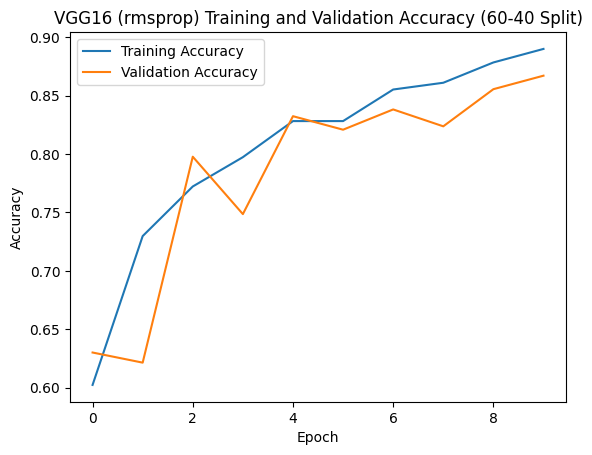

Epoch 1/10
22/22 [==============================] - 34s 863ms/step - loss: 0.6499 - accuracy: 0.6773 - val_loss: 0.3909 - val_accuracy: 0.8150
Epoch 2/10
22/22 [==============================] - 18s 826ms/step - loss: 0.3498 - accuracy: 0.8509 - val_loss: 0.2854 - val_accuracy: 0.8844
Epoch 3/10
22/22 [==============================] - 18s 839ms/step - loss: 0.2377 - accuracy: 0.9001 - val_loss: 0.3083 - val_accuracy: 0.8844
Epoch 4/10
22/22 [==============================] - 18s 839ms/step - loss: 0.1808 - accuracy: 0.9320 - val_loss: 0.2835 - val_accuracy: 0.9017
Epoch 5/10
22/22 [==============================] - 18s 803ms/step - loss: 0.1457 - accuracy: 0.9508 - val_loss: 0.2178 - val_accuracy: 0.9133
Epoch 6/10
22/22 [==============================] - 18s 817ms/step - loss: 0.1229 - accuracy: 0.9566 - val_loss: 0.2349 - val_accuracy: 0.9133
Epoch 7/10
22/22 [==============================] - 17s 791ms/step - loss: 0.0996 - accuracy: 0.9754 - val_loss: 0.2100 - val_accuracy: 0.9249

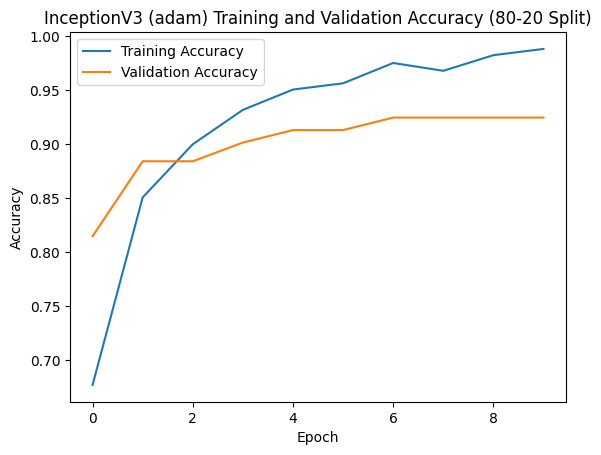

Epoch 1/10
19/19 [==============================] - 22s 1s/step - loss: 0.5656 - accuracy: 0.7401 - val_loss: 0.3151 - val_accuracy: 0.8731
Epoch 2/10
19/19 [==============================] - 17s 911ms/step - loss: 0.2674 - accuracy: 0.8791 - val_loss: 0.2659 - val_accuracy: 0.8731
Epoch 3/10
19/19 [==============================] - 18s 953ms/step - loss: 0.1805 - accuracy: 0.9272 - val_loss: 0.2484 - val_accuracy: 0.8962
Epoch 4/10
19/19 [==============================] - 18s 970ms/step - loss: 0.1257 - accuracy: 0.9570 - val_loss: 0.2672 - val_accuracy: 0.8808
Epoch 5/10
19/19 [==============================] - 18s 963ms/step - loss: 0.1079 - accuracy: 0.9735 - val_loss: 0.2434 - val_accuracy: 0.8846
Epoch 6/10
19/19 [==============================] - 18s 964ms/step - loss: 0.0706 - accuracy: 0.9884 - val_loss: 0.2338 - val_accuracy: 0.9077
Epoch 7/10
19/19 [==============================] - 17s 933ms/step - loss: 0.0595 - accuracy: 0.9917 - val_loss: 0.2425 - val_accuracy: 0.8962
Ep

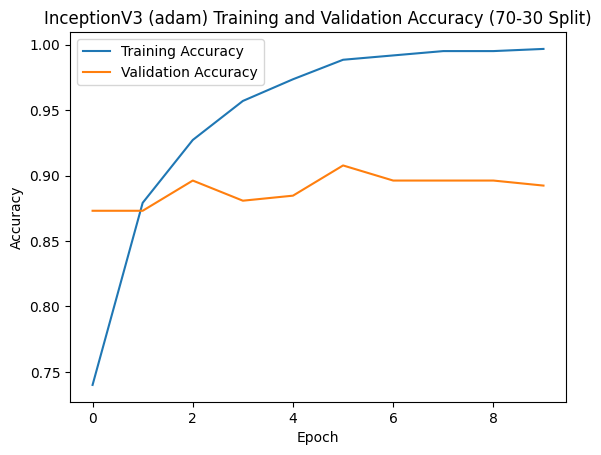

Epoch 1/10
17/17 [==============================] - 22s 1s/step - loss: 0.9373 - accuracy: 0.5560 - val_loss: 0.5479 - val_accuracy: 0.7110
Epoch 2/10
17/17 [==============================] - 17s 1s/step - loss: 0.4172 - accuracy: 0.8224 - val_loss: 0.3623 - val_accuracy: 0.8382
Epoch 3/10
17/17 [==============================] - 18s 1s/step - loss: 0.3047 - accuracy: 0.8629 - val_loss: 0.2830 - val_accuracy: 0.8786
Epoch 4/10
17/17 [==============================] - 18s 1s/step - loss: 0.2322 - accuracy: 0.9035 - val_loss: 0.2598 - val_accuracy: 0.8988
Epoch 5/10
17/17 [==============================] - 18s 1s/step - loss: 0.2297 - accuracy: 0.8977 - val_loss: 0.2668 - val_accuracy: 0.9104
Epoch 6/10
17/17 [==============================] - 18s 1s/step - loss: 0.1715 - accuracy: 0.9382 - val_loss: 0.2341 - val_accuracy: 0.9133
Epoch 7/10
17/17 [==============================] - 17s 1s/step - loss: 0.1299 - accuracy: 0.9633 - val_loss: 0.2183 - val_accuracy: 0.9017
Epoch 8/10
17/17 [==

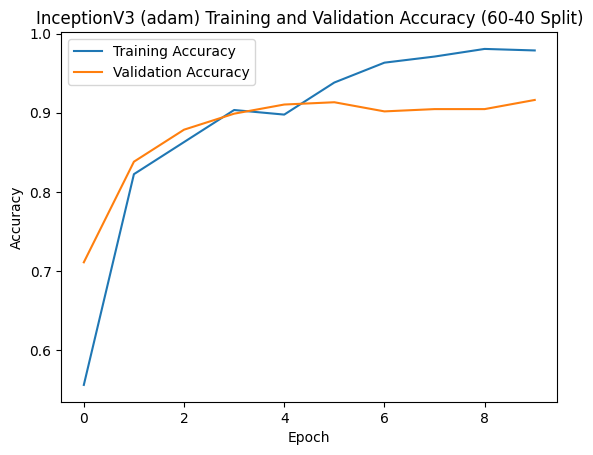

Epoch 1/10
22/22 [==============================] - 21s 829ms/step - loss: 0.5583 - accuracy: 0.7062 - val_loss: 0.4938 - val_accuracy: 0.7399
Epoch 2/10
22/22 [==============================] - 18s 820ms/step - loss: 0.4082 - accuracy: 0.8234 - val_loss: 0.3673 - val_accuracy: 0.8671
Epoch 3/10
22/22 [==============================] - 17s 795ms/step - loss: 0.3374 - accuracy: 0.8770 - val_loss: 0.3306 - val_accuracy: 0.8902
Epoch 4/10
22/22 [==============================] - 18s 816ms/step - loss: 0.2949 - accuracy: 0.8929 - val_loss: 0.2944 - val_accuracy: 0.8960
Epoch 5/10
22/22 [==============================] - 18s 809ms/step - loss: 0.2596 - accuracy: 0.9045 - val_loss: 0.3277 - val_accuracy: 0.8382
Epoch 6/10
22/22 [==============================] - 17s 769ms/step - loss: 0.2511 - accuracy: 0.9001 - val_loss: 0.2772 - val_accuracy: 0.9191
Epoch 7/10
22/22 [==============================] - 18s 825ms/step - loss: 0.2242 - accuracy: 0.9219 - val_loss: 0.3006 - val_accuracy: 0.8613

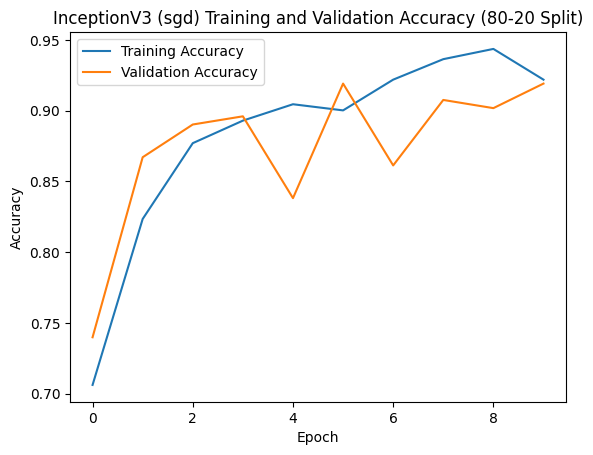

Epoch 1/10
19/19 [==============================] - 22s 1s/step - loss: 0.6948 - accuracy: 0.6109 - val_loss: 0.5265 - val_accuracy: 0.7692
Epoch 2/10
19/19 [==============================] - 19s 997ms/step - loss: 0.4673 - accuracy: 0.8063 - val_loss: 0.4559 - val_accuracy: 0.8038
Epoch 3/10
19/19 [==============================] - 17s 925ms/step - loss: 0.3896 - accuracy: 0.8543 - val_loss: 0.3961 - val_accuracy: 0.8385
Epoch 4/10
19/19 [==============================] - 18s 939ms/step - loss: 0.3294 - accuracy: 0.8874 - val_loss: 0.3554 - val_accuracy: 0.8615
Epoch 5/10
19/19 [==============================] - 18s 940ms/step - loss: 0.3039 - accuracy: 0.8924 - val_loss: 0.3367 - val_accuracy: 0.8692
Epoch 6/10
19/19 [==============================] - 18s 936ms/step - loss: 0.2655 - accuracy: 0.9106 - val_loss: 0.3378 - val_accuracy: 0.8615
Epoch 7/10
19/19 [==============================] - 18s 956ms/step - loss: 0.2499 - accuracy: 0.9222 - val_loss: 0.2978 - val_accuracy: 0.8808
Ep

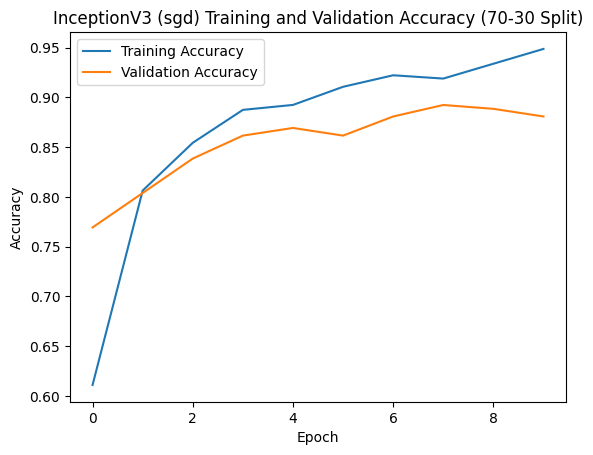

Epoch 1/10
17/17 [==============================] - 21s 1s/step - loss: 0.6061 - accuracy: 0.6757 - val_loss: 0.5438 - val_accuracy: 0.7110
Epoch 2/10
17/17 [==============================] - 18s 1s/step - loss: 0.4677 - accuracy: 0.8050 - val_loss: 0.5416 - val_accuracy: 0.7081
Epoch 3/10
17/17 [==============================] - 18s 1s/step - loss: 0.4095 - accuracy: 0.8205 - val_loss: 0.5129 - val_accuracy: 0.7225
Epoch 4/10
17/17 [==============================] - 18s 1s/step - loss: 0.3529 - accuracy: 0.8533 - val_loss: 0.3490 - val_accuracy: 0.8757
Epoch 5/10
17/17 [==============================] - 18s 1s/step - loss: 0.3069 - accuracy: 0.8938 - val_loss: 0.5992 - val_accuracy: 0.6792
Epoch 6/10
17/17 [==============================] - 17s 1s/step - loss: 0.3033 - accuracy: 0.8842 - val_loss: 0.3039 - val_accuracy: 0.8902
Epoch 7/10
17/17 [==============================] - 17s 1s/step - loss: 0.2590 - accuracy: 0.9170 - val_loss: 0.5100 - val_accuracy: 0.7370
Epoch 8/10
17/17 [==

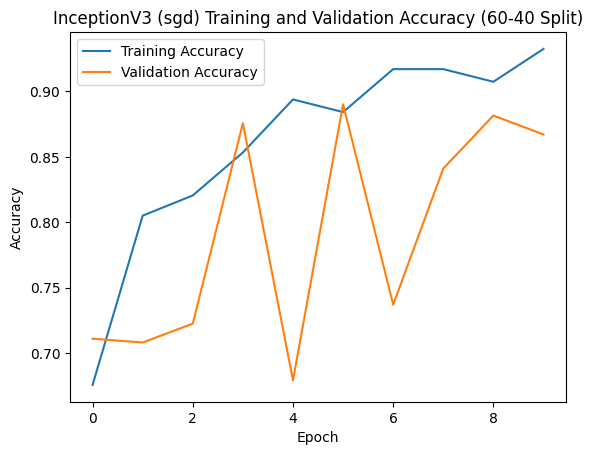

Epoch 1/10
22/22 [==============================] - 22s 847ms/step - loss: 0.9775 - accuracy: 0.6729 - val_loss: 0.6802 - val_accuracy: 0.6532
Epoch 2/10
22/22 [==============================] - 19s 855ms/step - loss: 0.4320 - accuracy: 0.8017 - val_loss: 0.9921 - val_accuracy: 0.5896
Epoch 3/10
22/22 [==============================] - 18s 806ms/step - loss: 0.3473 - accuracy: 0.8466 - val_loss: 0.2945 - val_accuracy: 0.8844
Epoch 4/10
22/22 [==============================] - 18s 818ms/step - loss: 0.3332 - accuracy: 0.8553 - val_loss: 0.3067 - val_accuracy: 0.8671
Epoch 5/10
22/22 [==============================] - 18s 822ms/step - loss: 0.3059 - accuracy: 0.8553 - val_loss: 0.2459 - val_accuracy: 0.9017
Epoch 6/10
22/22 [==============================] - 17s 784ms/step - loss: 0.2070 - accuracy: 0.9132 - val_loss: 0.2505 - val_accuracy: 0.9191
Epoch 7/10
22/22 [==============================] - 17s 785ms/step - loss: 0.2054 - accuracy: 0.9161 - val_loss: 0.5791 - val_accuracy: 0.7803

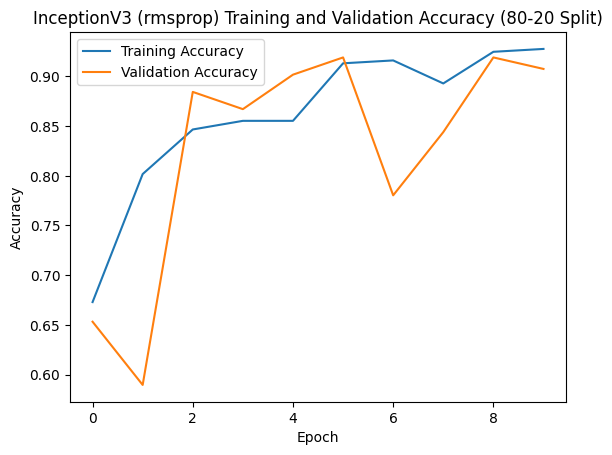

Epoch 1/10
19/19 [==============================] - 22s 1s/step - loss: 1.0253 - accuracy: 0.6672 - val_loss: 0.5365 - val_accuracy: 0.7269
Epoch 2/10
19/19 [==============================] - 18s 966ms/step - loss: 0.4042 - accuracy: 0.8079 - val_loss: 0.3208 - val_accuracy: 0.8692
Epoch 3/10
19/19 [==============================] - 18s 975ms/step - loss: 0.4040 - accuracy: 0.8212 - val_loss: 0.6667 - val_accuracy: 0.6962
Epoch 4/10
19/19 [==============================] - 18s 952ms/step - loss: 0.3167 - accuracy: 0.8560 - val_loss: 0.3424 - val_accuracy: 0.8423
Epoch 5/10
19/19 [==============================] - 18s 958ms/step - loss: 0.3224 - accuracy: 0.8659 - val_loss: 0.2699 - val_accuracy: 0.9000
Epoch 6/10
19/19 [==============================] - 18s 942ms/step - loss: 0.2646 - accuracy: 0.8725 - val_loss: 0.2481 - val_accuracy: 0.9038
Epoch 7/10
19/19 [==============================] - 18s 972ms/step - loss: 0.2826 - accuracy: 0.8742 - val_loss: 0.2804 - val_accuracy: 0.9000
Ep

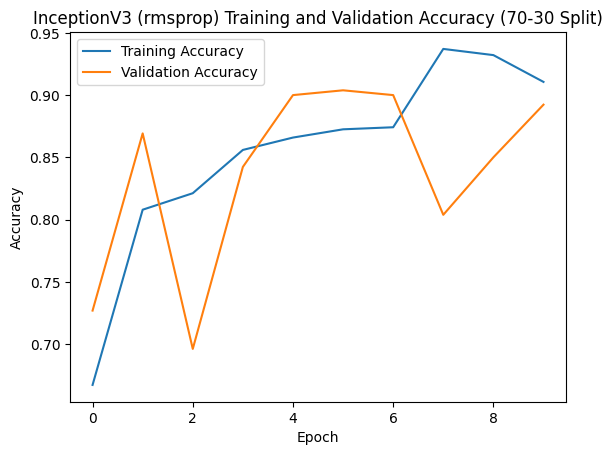

Epoch 1/10
17/17 [==============================] - 33s 1s/step - loss: 1.1094 - accuracy: 0.6274 - val_loss: 0.5334 - val_accuracy: 0.7081
Epoch 2/10
17/17 [==============================] - 18s 1s/step - loss: 0.4846 - accuracy: 0.7664 - val_loss: 0.3761 - val_accuracy: 0.8468
Epoch 3/10
17/17 [==============================] - 18s 1s/step - loss: 0.4239 - accuracy: 0.7992 - val_loss: 0.4254 - val_accuracy: 0.7832
Epoch 4/10
17/17 [==============================] - 18s 1s/step - loss: 0.3995 - accuracy: 0.8012 - val_loss: 0.3316 - val_accuracy: 0.8699
Epoch 5/10
17/17 [==============================] - 18s 1s/step - loss: 0.2572 - accuracy: 0.9093 - val_loss: 0.4763 - val_accuracy: 0.7948
Epoch 6/10
17/17 [==============================] - 19s 1s/step - loss: 0.2685 - accuracy: 0.8900 - val_loss: 0.6257 - val_accuracy: 0.7023
Epoch 7/10
17/17 [==============================] - 18s 1s/step - loss: 0.2699 - accuracy: 0.8842 - val_loss: 0.3462 - val_accuracy: 0.8353
Epoch 8/10
17/17 [==

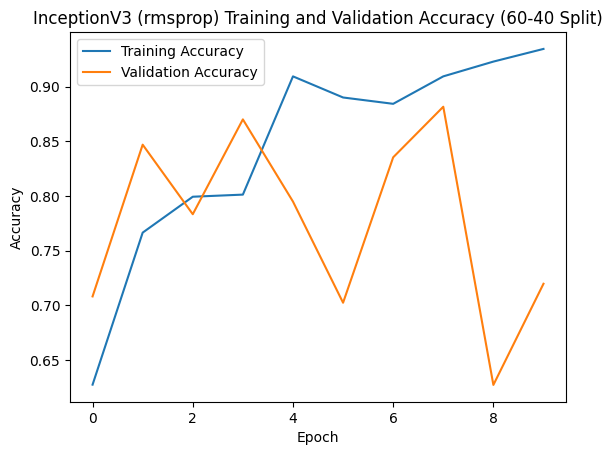

Epoch 1/10
22/22 [==============================] - 38s 2s/step - loss: 0.6957 - accuracy: 0.5586 - val_loss: 0.6016 - val_accuracy: 0.6879
Epoch 2/10
22/22 [==============================] - 35s 2s/step - loss: 0.6340 - accuracy: 0.6353 - val_loss: 0.6434 - val_accuracy: 0.6012
Epoch 3/10
22/22 [==============================] - 34s 2s/step - loss: 0.6094 - accuracy: 0.6773 - val_loss: 0.5780 - val_accuracy: 0.7110
Epoch 4/10
22/22 [==============================] - 34s 2s/step - loss: 0.5895 - accuracy: 0.6961 - val_loss: 0.6263 - val_accuracy: 0.6474
Epoch 5/10
22/22 [==============================] - 34s 2s/step - loss: 0.5907 - accuracy: 0.6773 - val_loss: 0.5704 - val_accuracy: 0.6994
Epoch 6/10
22/22 [==============================] - 33s 2s/step - loss: 0.5467 - accuracy: 0.7178 - val_loss: 0.5594 - val_accuracy: 0.7514
Epoch 7/10
22/22 [==============================] - 33s 2s/step - loss: 0.5423 - accuracy: 0.7265 - val_loss: 0.5542 - val_accuracy: 0.7341
Epoch 8/10
22/22 [==

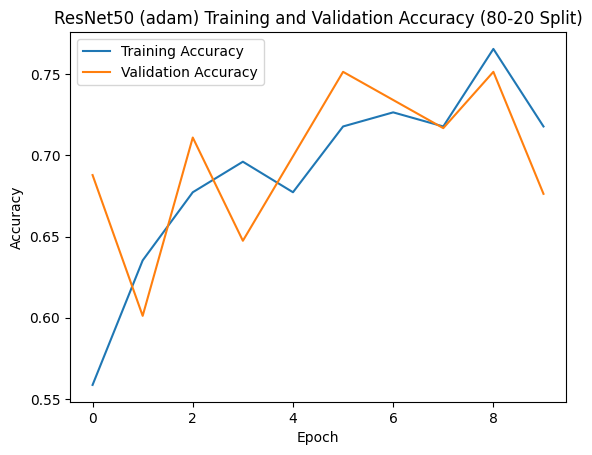

Epoch 1/10
19/19 [==============================] - 38s 2s/step - loss: 0.7013 - accuracy: 0.5546 - val_loss: 0.6360 - val_accuracy: 0.6462
Epoch 2/10
19/19 [==============================] - 34s 2s/step - loss: 0.6372 - accuracy: 0.6407 - val_loss: 0.6016 - val_accuracy: 0.6808
Epoch 3/10
19/19 [==============================] - 33s 2s/step - loss: 0.6088 - accuracy: 0.6738 - val_loss: 0.5936 - val_accuracy: 0.6846
Epoch 4/10
19/19 [==============================] - 34s 2s/step - loss: 0.6068 - accuracy: 0.6540 - val_loss: 0.5923 - val_accuracy: 0.6962
Epoch 5/10
19/19 [==============================] - 33s 2s/step - loss: 0.6153 - accuracy: 0.6523 - val_loss: 0.6700 - val_accuracy: 0.6000
Epoch 6/10
19/19 [==============================] - 33s 2s/step - loss: 0.6041 - accuracy: 0.6589 - val_loss: 0.5668 - val_accuracy: 0.7192
Epoch 7/10
19/19 [==============================] - 33s 2s/step - loss: 0.6151 - accuracy: 0.6523 - val_loss: 0.5693 - val_accuracy: 0.7231
Epoch 8/10
19/19 [==

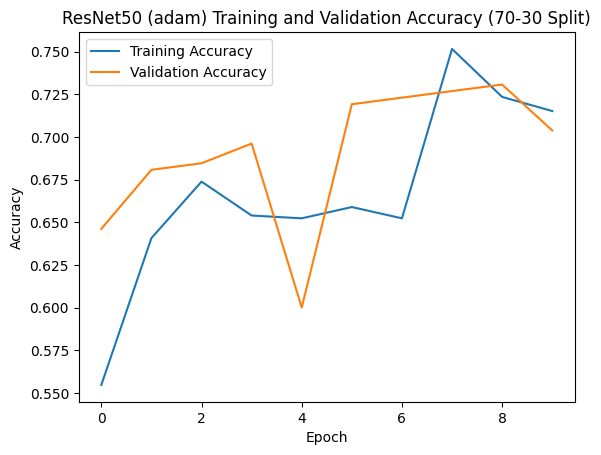

Epoch 1/10
17/17 [==============================] - 38s 2s/step - loss: 0.7760 - accuracy: 0.5174 - val_loss: 0.6343 - val_accuracy: 0.6705
Epoch 2/10
17/17 [==============================] - 33s 2s/step - loss: 0.6539 - accuracy: 0.6236 - val_loss: 0.6652 - val_accuracy: 0.5723
Epoch 3/10
17/17 [==============================] - 33s 2s/step - loss: 0.6655 - accuracy: 0.5849 - val_loss: 0.6350 - val_accuracy: 0.6040
Epoch 4/10
17/17 [==============================] - 33s 2s/step - loss: 0.6168 - accuracy: 0.6602 - val_loss: 0.5941 - val_accuracy: 0.6908
Epoch 5/10
17/17 [==============================] - 33s 2s/step - loss: 0.5923 - accuracy: 0.6931 - val_loss: 0.6360 - val_accuracy: 0.6069
Epoch 6/10
17/17 [==============================] - 33s 2s/step - loss: 0.5894 - accuracy: 0.6892 - val_loss: 0.5856 - val_accuracy: 0.7110
Epoch 7/10
17/17 [==============================] - 33s 2s/step - loss: 0.5657 - accuracy: 0.7046 - val_loss: 0.6175 - val_accuracy: 0.6850
Epoch 8/10
17/17 [==

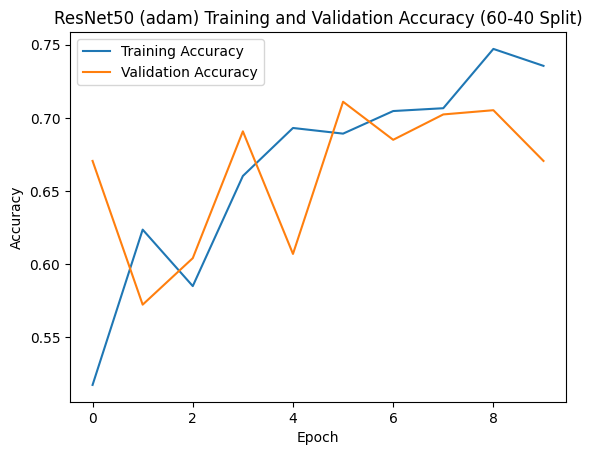

Epoch 1/10
22/22 [==============================] - 38s 2s/step - loss: 0.7592 - accuracy: 0.5109 - val_loss: 0.6559 - val_accuracy: 0.6416
Epoch 2/10
22/22 [==============================] - 34s 2s/step - loss: 0.7113 - accuracy: 0.5340 - val_loss: 0.6648 - val_accuracy: 0.5260
Epoch 3/10
22/22 [==============================] - 34s 2s/step - loss: 0.6802 - accuracy: 0.5731 - val_loss: 0.6513 - val_accuracy: 0.6358
Epoch 4/10
22/22 [==============================] - 34s 2s/step - loss: 0.6659 - accuracy: 0.5745 - val_loss: 0.6729 - val_accuracy: 0.5607
Epoch 5/10
22/22 [==============================] - 33s 2s/step - loss: 0.6720 - accuracy: 0.5789 - val_loss: 0.6424 - val_accuracy: 0.6416
Epoch 6/10
22/22 [==============================] - 34s 2s/step - loss: 0.6675 - accuracy: 0.6035 - val_loss: 0.6566 - val_accuracy: 0.5607
Epoch 7/10
22/22 [==============================] - 34s 2s/step - loss: 0.6763 - accuracy: 0.5832 - val_loss: 0.7552 - val_accuracy: 0.5087
Epoch 8/10
22/22 [==

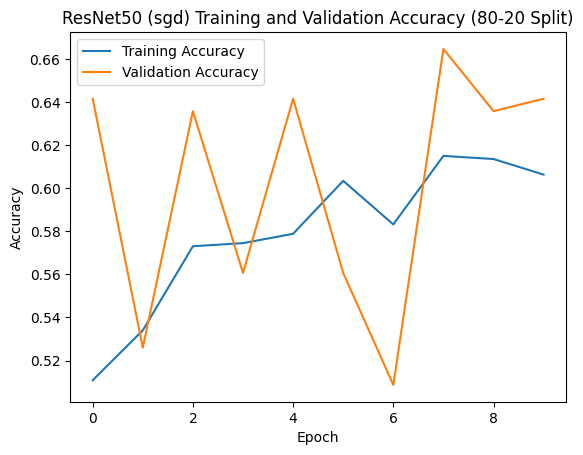

Epoch 1/10
19/19 [==============================] - 38s 2s/step - loss: 0.7253 - accuracy: 0.5149 - val_loss: 0.6619 - val_accuracy: 0.6077
Epoch 2/10
19/19 [==============================] - 33s 2s/step - loss: 0.7512 - accuracy: 0.5132 - val_loss: 0.6868 - val_accuracy: 0.5346
Epoch 3/10
19/19 [==============================] - 34s 2s/step - loss: 0.7086 - accuracy: 0.5265 - val_loss: 0.6765 - val_accuracy: 0.5154
Epoch 4/10
19/19 [==============================] - 34s 2s/step - loss: 0.6748 - accuracy: 0.5795 - val_loss: 0.6475 - val_accuracy: 0.6346
Epoch 5/10
19/19 [==============================] - 34s 2s/step - loss: 0.6857 - accuracy: 0.5579 - val_loss: 0.6425 - val_accuracy: 0.6231
Epoch 6/10
19/19 [==============================] - 34s 2s/step - loss: 0.7052 - accuracy: 0.5397 - val_loss: 0.6827 - val_accuracy: 0.5115
Epoch 7/10
19/19 [==============================] - 35s 2s/step - loss: 0.6746 - accuracy: 0.5712 - val_loss: 0.6596 - val_accuracy: 0.5962
Epoch 8/10
19/19 [==

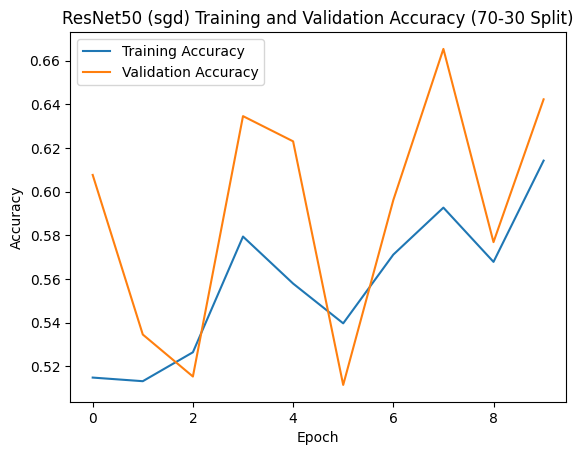

Epoch 1/10
17/17 [==============================] - 38s 2s/step - loss: 0.8096 - accuracy: 0.5328 - val_loss: 0.6847 - val_accuracy: 0.5087
Epoch 2/10
17/17 [==============================] - 34s 2s/step - loss: 0.7671 - accuracy: 0.5135 - val_loss: 0.6782 - val_accuracy: 0.5434
Epoch 3/10
17/17 [==============================] - 34s 2s/step - loss: 0.7211 - accuracy: 0.5367 - val_loss: 0.9475 - val_accuracy: 0.5000
Epoch 4/10
17/17 [==============================] - 34s 2s/step - loss: 0.6969 - accuracy: 0.5656 - val_loss: 0.6943 - val_accuracy: 0.5347
Epoch 5/10
17/17 [==============================] - 34s 2s/step - loss: 0.7060 - accuracy: 0.5502 - val_loss: 0.8382 - val_accuracy: 0.5000
Epoch 6/10
17/17 [==============================] - 34s 2s/step - loss: 0.6714 - accuracy: 0.6178 - val_loss: 1.0108 - val_accuracy: 0.5000
Epoch 7/10
17/17 [==============================] - 34s 2s/step - loss: 0.6953 - accuracy: 0.5560 - val_loss: 0.6977 - val_accuracy: 0.5116
Epoch 8/10
17/17 [==

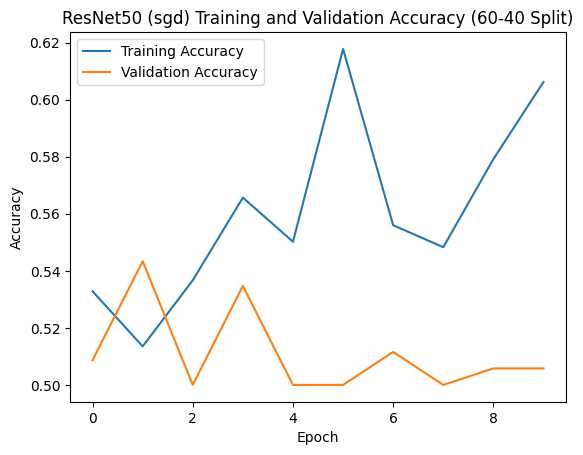

Epoch 1/10
22/22 [==============================] - 38s 2s/step - loss: 0.8061 - accuracy: 0.5412 - val_loss: 0.6118 - val_accuracy: 0.6705
Epoch 2/10
22/22 [==============================] - 34s 2s/step - loss: 0.7020 - accuracy: 0.5572 - val_loss: 0.6270 - val_accuracy: 0.6358
Epoch 3/10
22/22 [==============================] - 34s 2s/step - loss: 0.6555 - accuracy: 0.6151 - val_loss: 0.5980 - val_accuracy: 0.6705
Epoch 4/10
22/22 [==============================] - 34s 2s/step - loss: 0.6534 - accuracy: 0.6093 - val_loss: 0.5888 - val_accuracy: 0.7110
Epoch 5/10
22/22 [==============================] - 34s 2s/step - loss: 0.6330 - accuracy: 0.6353 - val_loss: 0.6841 - val_accuracy: 0.5838
Epoch 6/10
22/22 [==============================] - 34s 2s/step - loss: 0.6391 - accuracy: 0.6368 - val_loss: 0.5897 - val_accuracy: 0.6994
Epoch 7/10
22/22 [==============================] - 34s 2s/step - loss: 0.6082 - accuracy: 0.6628 - val_loss: 0.5663 - val_accuracy: 0.7110
Epoch 8/10
22/22 [==

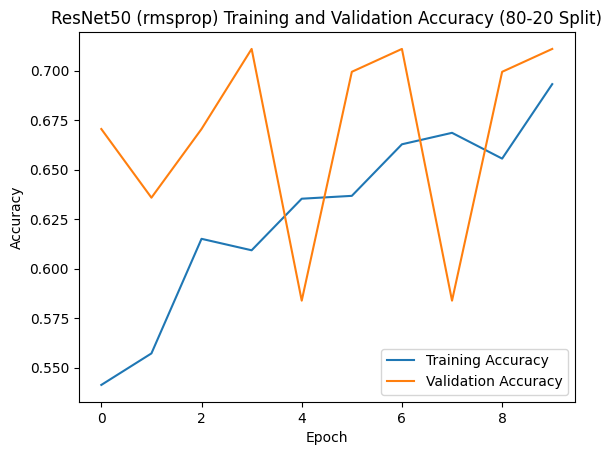

Epoch 1/10
19/19 [==============================] - 39s 2s/step - loss: 0.8111 - accuracy: 0.5215 - val_loss: 0.6209 - val_accuracy: 0.6769
Epoch 2/10
19/19 [==============================] - 34s 2s/step - loss: 0.6770 - accuracy: 0.5861 - val_loss: 0.7050 - val_accuracy: 0.5115
Epoch 3/10
19/19 [==============================] - 34s 2s/step - loss: 0.6416 - accuracy: 0.6325 - val_loss: 0.6048 - val_accuracy: 0.6923
Epoch 4/10
19/19 [==============================] - 33s 2s/step - loss: 0.6503 - accuracy: 0.6225 - val_loss: 0.5871 - val_accuracy: 0.6962
Epoch 5/10
19/19 [==============================] - 33s 2s/step - loss: 0.6354 - accuracy: 0.6225 - val_loss: 0.6179 - val_accuracy: 0.6654
Epoch 6/10
19/19 [==============================] - 34s 2s/step - loss: 0.6260 - accuracy: 0.6722 - val_loss: 0.6076 - val_accuracy: 0.6846
Epoch 7/10
19/19 [==============================] - 34s 2s/step - loss: 0.6211 - accuracy: 0.6788 - val_loss: 0.6892 - val_accuracy: 0.5885
Epoch 8/10
19/19 [==

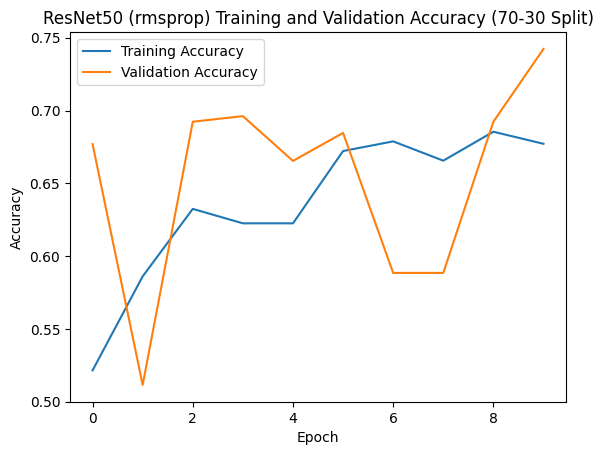

Epoch 1/10
17/17 [==============================] - 38s 2s/step - loss: 0.8299 - accuracy: 0.5154 - val_loss: 0.6340 - val_accuracy: 0.6647
Epoch 2/10
17/17 [==============================] - 34s 2s/step - loss: 0.7022 - accuracy: 0.5985 - val_loss: 0.9079 - val_accuracy: 0.5116
Epoch 3/10
17/17 [==============================] - 34s 2s/step - loss: 0.6394 - accuracy: 0.6525 - val_loss: 1.2829 - val_accuracy: 0.5000
Epoch 4/10
17/17 [==============================] - 34s 2s/step - loss: 0.6849 - accuracy: 0.6525 - val_loss: 0.6152 - val_accuracy: 0.6734
Epoch 5/10
17/17 [==============================] - 33s 2s/step - loss: 0.6237 - accuracy: 0.6564 - val_loss: 1.1694 - val_accuracy: 0.5000
Epoch 6/10
17/17 [==============================] - 33s 2s/step - loss: 0.6334 - accuracy: 0.6680 - val_loss: 0.7606 - val_accuracy: 0.5202
Epoch 7/10
17/17 [==============================] - 34s 2s/step - loss: 0.6259 - accuracy: 0.6486 - val_loss: 0.5899 - val_accuracy: 0.7081
Epoch 8/10
17/17 [==

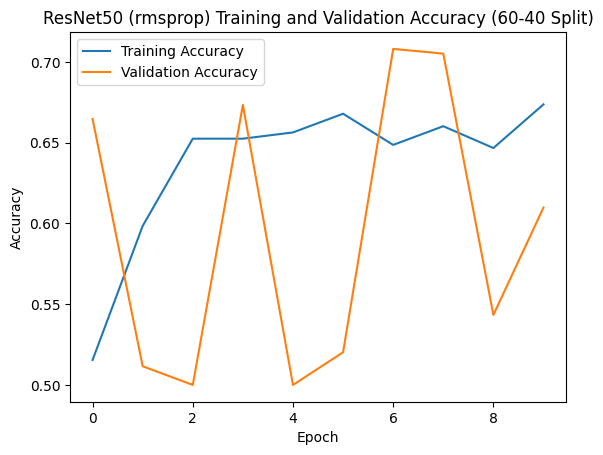

In [9]:
for model_name, model_func in models.items():
    for optimizer in optimizers:
        for test_size, train_size in splits:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
            model = model_func(optimizer)
            history, test_loss, test_accuracy = train_and_evaluate_model(X_train, X_test, y_train, y_test, model)
            plot_training(history, f'{model_name} ({optimizer}) Training and Validation Accuracy ({int(train_size*100)}-{int(test_size*100)} Split)')